In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

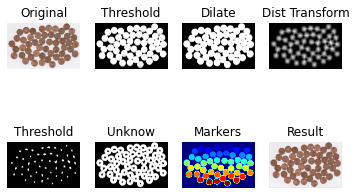

In [31]:
src = cv2.imread('1.jpg')
img = src.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(thresh, kernel, iterations=2)
dist_transform = cv2.distanceTransform(sure_bg, 1, 5)
dist_transform = np.uint8(dist_transform)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers1 = cv2.connectedComponents(sure_fg)
 
markers = markers1 + 1

markers[unknown == 255] = 0
    
markers3 = cv2.watershed(img, markers)
img[markers3 == -1] = [0, 0, 255]

plt.subplot(241), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),
plt.title('Original'), plt.axis('off')
plt.subplot(242), plt.imshow(thresh, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(243), plt.imshow(sure_bg, cmap='gray'),
plt.title('Dilate'), plt.axis('off')
plt.subplot(244), plt.imshow(dist_transform, cmap='gray'),
plt.title('Dist Transform'), plt.axis('off')
plt.subplot(245), plt.imshow(sure_fg, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(246), plt.imshow(unknown, cmap='gray'),
plt.title('Unknow'), plt.axis('off')
plt.subplot(247), plt.imshow(np.abs(markers), cmap='jet'),
plt.title('Markers'), plt.axis('off')
plt.subplot(248), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
plt.title('Result'), plt.axis('off')
 
plt.show()

cv2.imshow("img",img)

cv2.waitKey(0)
cv2.destroyAllWindows()